EXPLORACIÓN DE DATOS

In [62]:
import pandas as pd
import seaborn as sns

In [63]:
products = pd.read_csv('data_sackoff.csv')
products.head()

,FY,Month,Código,consumption,rework consumption,production packing,rework generation,sackoff,Cost Sackoff
0,2024-2025,6,PT0001,-650.01,NaN,603.000,28.4530,"-18,56","($33402,60)"
1,2024-2025,7,PT0001,-1965.46,NaN,1870.975,83.8170,"-10,67","($19202,40)"
2,2024-2025,8,PT0001,-1605.19,-4.95,1350.975,71.2915,"-12,86","($23154,30)"
3,2024-2025,6,PT0002,-1244.95,NaN,1206.925,39.1130,"1,09","$2012,80"
4,2024-2025,7,PT0002,-1480.24,NaN,1407.850,68.7165,"-3,67","($6795,98)"


In [64]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FY                  137 non-null    object 
 1   Month               137 non-null    int64  
 2   Código              137 non-null    object 
 3   consumption         137 non-null    float64
 4   rework consumption  8 non-null      float64
 5   production packing  137 non-null    float64
 6   rework generation   135 non-null    float64
 7   sackoff             137 non-null    object 
 8   Cost Sackoff        137 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 9.8+ KB


In [65]:
#transformar data a numerico
products['Cost Sackoff'] = products['Cost Sackoff'].str.replace('$', '')
products['Cost Sackoff'] = products['Cost Sackoff'].str.replace(',', '.')
products['Cost Sackoff'] = products['Cost Sackoff'].str.replace('(', '-')
products['Cost Sackoff'] = products['Cost Sackoff'].str.replace(')', '')

products['sackoff'] = products['sackoff'].str.replace(',', '.')

In [66]:
#Convertir a numerico
products['Cost Sackoff'] = pd.to_numeric(products['Cost Sackoff'])
products['sackoff'] = pd.to_numeric(products['sackoff'])

In [67]:
products.head()

,FY,Month,Código,consumption,rework consumption,production packing,rework generation,sackoff,Cost Sackoff
0,2024-2025,6,PT0001,-650.01,NaN,603.000,28.4530,-18.56,-33402.60
1,2024-2025,7,PT0001,-1965.46,NaN,1870.975,83.8170,-10.67,-19202.40
2,2024-2025,8,PT0001,-1605.19,-4.95,1350.975,71.2915,-12.86,-23154.30
3,2024-2025,6,PT0002,-1244.95,NaN,1206.925,39.1130,1.09,2012.80
4,2024-2025,7,PT0002,-1480.24,NaN,1407.850,68.7165,-3.67,-6795.98


In [68]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FY                  137 non-null    object 
 1   Month               137 non-null    int64  
 2   Código              137 non-null    object 
 3   consumption         137 non-null    float64
 4   rework consumption  8 non-null      float64
 5   production packing  137 non-null    float64
 6   rework generation   135 non-null    float64
 7   sackoff             137 non-null    float64
 8   Cost Sackoff        137 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 9.8+ KB


ÁNALISIS DESCRIPTIVO

In [69]:
products[['sackoff','Cost Sackoff']].describe()

,sackoff,Cost Sackoff
count,137.000000,137.000000
mean,-2.947153,-6278.473504
std,13.770083,34848.869705
min,-68.090000,-146390.280000
25%,-7.540000,-19273.630000
50%,-2.720000,-6091.450000
75%,1.280000,3563.450000
max,49.420000,148272.000000


Análisis de los datos

Variable sackoff

- La media es -2.95, con una desviación estándar de 13.77, lo que indica que los valores están bastante dispersos.
- El rango es amplio, desde -68.09 hasta 49.42, lo que sugiere la presencia de valores atípicos.
- La mediana (-2.72) está cerca de la media, lo que sugiere una distribución relativamente simétrica.

Variable Cost Sackoff

- La media es -6278.47, con una desviación estándar muy alta de 34,848.87, lo que indica una gran variabilidad en los datos.
- Hay valores negativos significativos, con un mínimo de -146,390.28, lo que sugiere que algunas observaciones tienen costos extremadamente bajos o pérdidas.
- La mediana es -6091.45, cercana a la media, lo que indica que la distribución no está fuertemente sesgada.
- Sin embargo, el percentil 75% es 3,563.45, lo que sugiere que una parte de los datos tiene valores positivos, mientras que la mayoría es negativa.
- El valor máximo de 148,272 indica la presencia de valores extremadamente altos, lo que contribuye a la gran desviación estándar.

<Axes: xlabel='sackoff', ylabel='Count'>

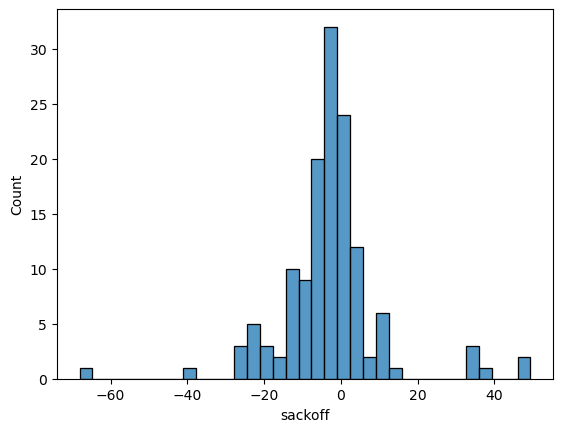

In [70]:
sns.histplot(products['sackoff'])

<Axes: xlabel='Cost Sackoff', ylabel='Count'>

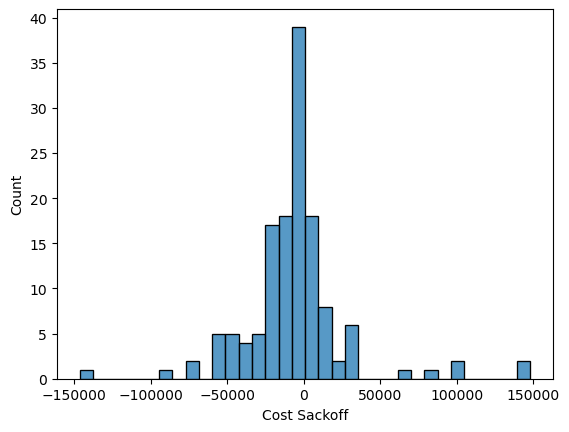

In [71]:
sns.histplot(products['Cost Sackoff'])

Los datos presentan una alta dispersión y valores extremos en la variable Cost Sackoff, lo que sugiere una distribución asimétrica con la mayoría de los valores siendo negativos pero algunos extremadamente altos. Esto podría indicar que la variable representa pérdidas y ganancias con fluctuaciones significativas. La variable sackoff parece más estable pero también con cierta variabilidad. La variabilidad de los datos para los precios se debe a que cada producto tiene un costo distinto por tonelada.

Para los análisis futuros no se van a considerar los costos debido a que debido a la segregación de los datos y a que sus variaciones son una consecuencia de las toneladas de sackoff, no representan un impacto significativo para los siguientes análisis.

In [72]:
#Eliminando columna de Cost Sackoff
products = products.drop(columns = 'Cost Sackoff')
products.head()

,FY,Month,Código,consumption,rework consumption,production packing,rework generation,sackoff
0,2024-2025,6,PT0001,-650.01,NaN,603.000,28.4530,-18.56
1,2024-2025,7,PT0001,-1965.46,NaN,1870.975,83.8170,-10.67
2,2024-2025,8,PT0001,-1605.19,-4.95,1350.975,71.2915,-12.86
3,2024-2025,6,PT0002,-1244.95,NaN,1206.925,39.1130,1.09
4,2024-2025,7,PT0002,-1480.24,NaN,1407.850,68.7165,-3.67


Se trataran los nulos como 0 para la columan de rework consumption y rework generation

In [73]:
#Rellenando datos nulos
products['rework consumption'] = products['rework consumption'].fillna(0)
products['rework generation'] = products['rework generation'].fillna(0)
products.head()

,FY,Month,Código,consumption,rework consumption,production packing,rework generation,sackoff
0,2024-2025,6,PT0001,-650.01,0.00,603.000,28.4530,-18.56
1,2024-2025,7,PT0001,-1965.46,0.00,1870.975,83.8170,-10.67
2,2024-2025,8,PT0001,-1605.19,-4.95,1350.975,71.2915,-12.86
3,2024-2025,6,PT0002,-1244.95,0.00,1206.925,39.1130,1.09
4,2024-2025,7,PT0002,-1480.24,0.00,1407.850,68.7165,-3.67


In [74]:
products['Month'].unique()

array([ 6,  7,  8,  9, 10, 11], dtype=int64)

In [75]:
products['FY'].unique()

array(['2024-2025'], dtype=object)

In [76]:
#Eliminando columna de FY
products = products.drop(columns = 'FY')
products.head()

,Month,Código,consumption,rework consumption,production packing,rework generation,sackoff
0,6,PT0001,-650.01,0.00,603.000,28.4530,-18.56
1,7,PT0001,-1965.46,0.00,1870.975,83.8170,-10.67
2,8,PT0001,-1605.19,-4.95,1350.975,71.2915,-12.86
3,6,PT0002,-1244.95,0.00,1206.925,39.1130,1.09
4,7,PT0002,-1480.24,0.00,1407.850,68.7165,-3.67


In [77]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               137 non-null    int64  
 1   Código              137 non-null    object 
 2   consumption         137 non-null    float64
 3   rework consumption  137 non-null    float64
 4   production packing  137 non-null    float64
 5   rework generation   137 non-null    float64
 6   sackoff             137 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.6+ KB


CLUSTERING

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [79]:
products['Código'] = products['Código'].str.extract('(\d+)').astype(int)
products['Código'].head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_16768\3092567302.py:1: SyntaxWarning: invalid escape sequence '\d'
  products['Código'] = products['Código'].str.extract('(\d+)').astype(int)


0    1
1    1
2    1
3    2
4    2
Name: Código, dtype: int32

In [80]:
df = products.copy()
df.drop(columns=['Código'], inplace=True)

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
                                
# Aplicamos KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  
df['cluster'] = kmeans.fit_predict(X_scaled)



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

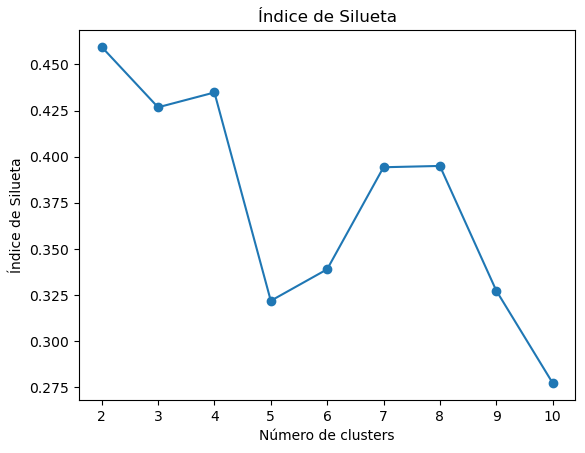

In [81]:
from sklearn.metrics import silhouette_score

# Evaluación con índice de silueta para diferentes números de clusters
silhouette_scores = []
for i in range(2, 11):  # Probar con 2 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Graficar el índice de silueta vs. número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Índice de Silueta')
plt.xlabel('Número de clusters')
plt.ylabel('Índice de Silueta')
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


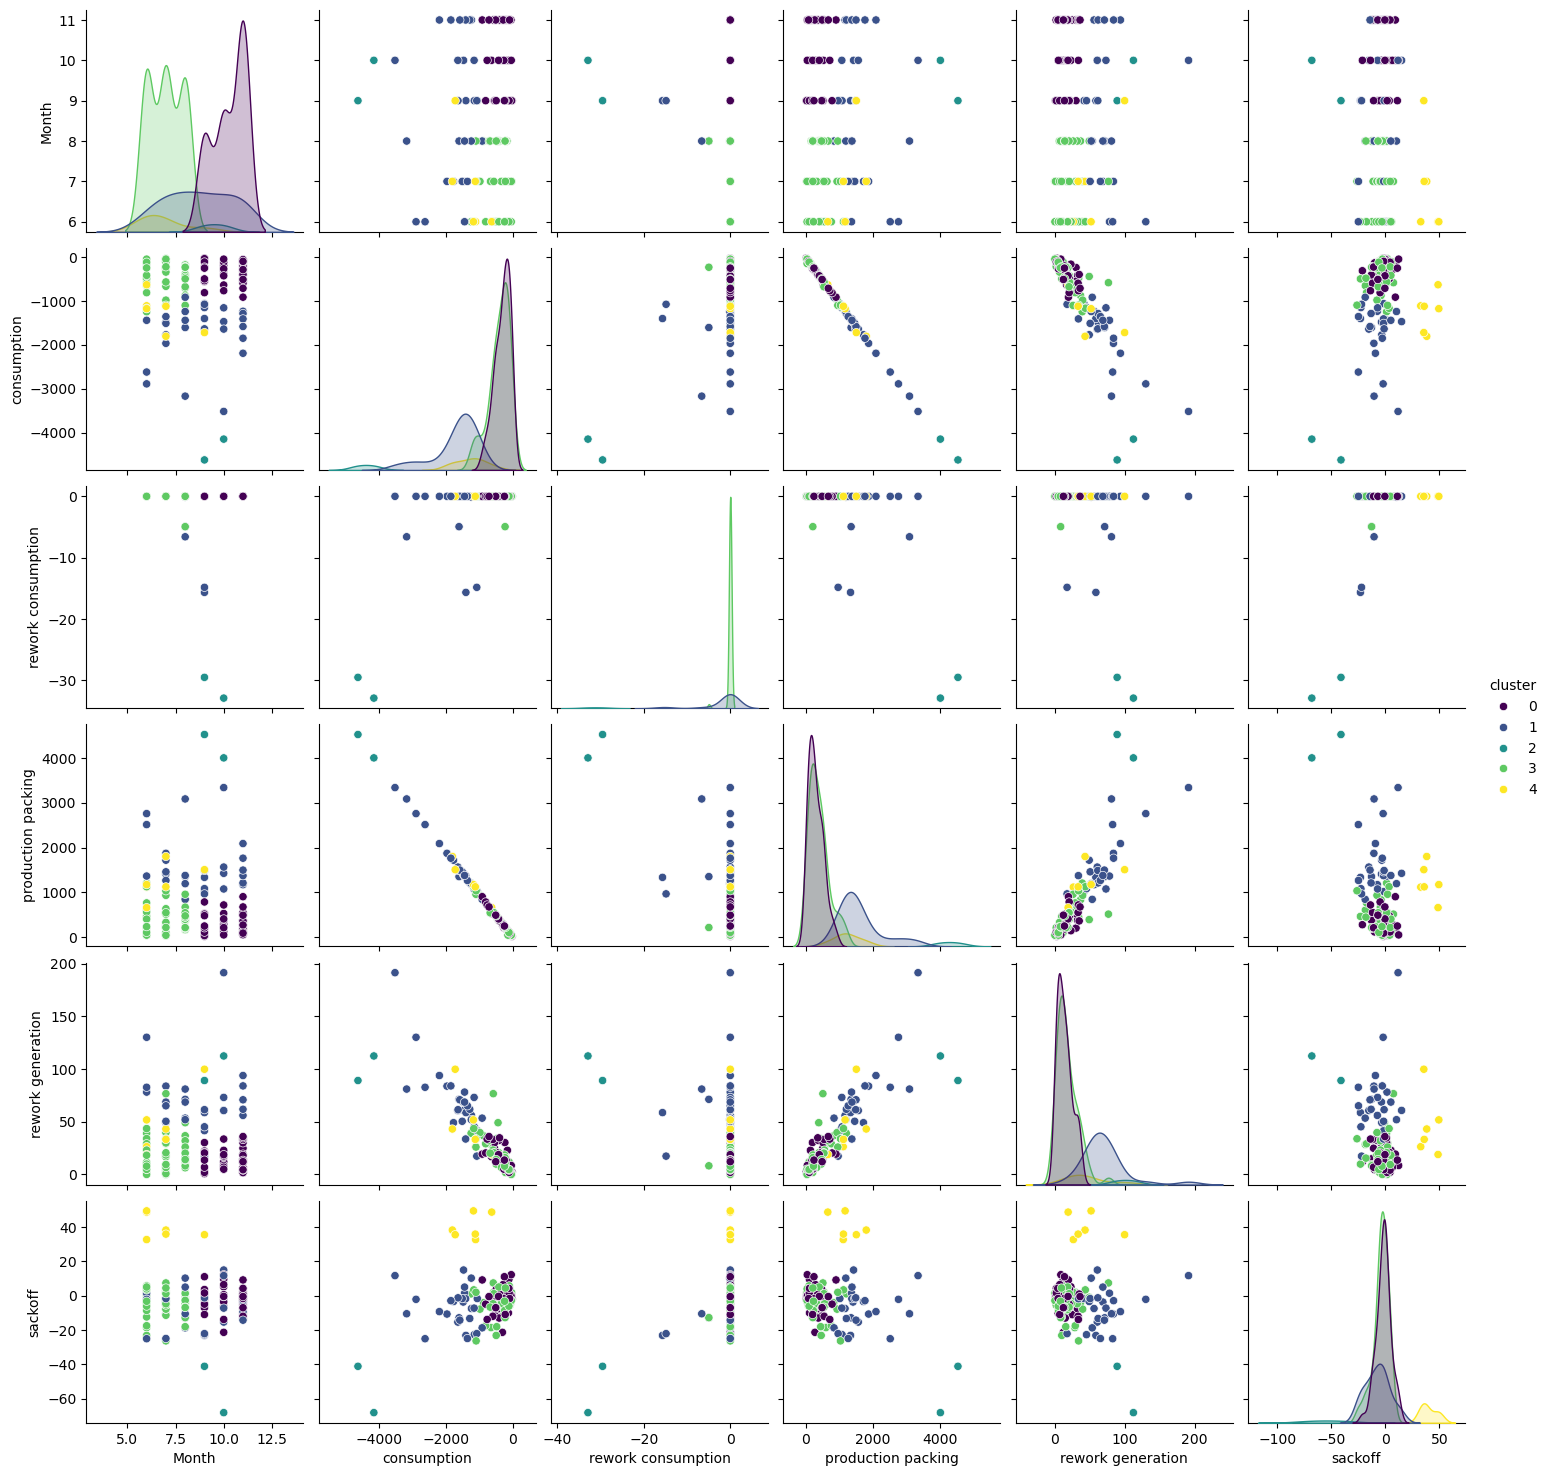

In [86]:
# Ajuste de hiperparámetros
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
# Graficar una matriz de relaciones
sns.pairplot(df, hue='cluster', vars=['Month','consumption', 'rework consumption','production packing','rework generation','sackoff'], palette='viridis')
plt.show()

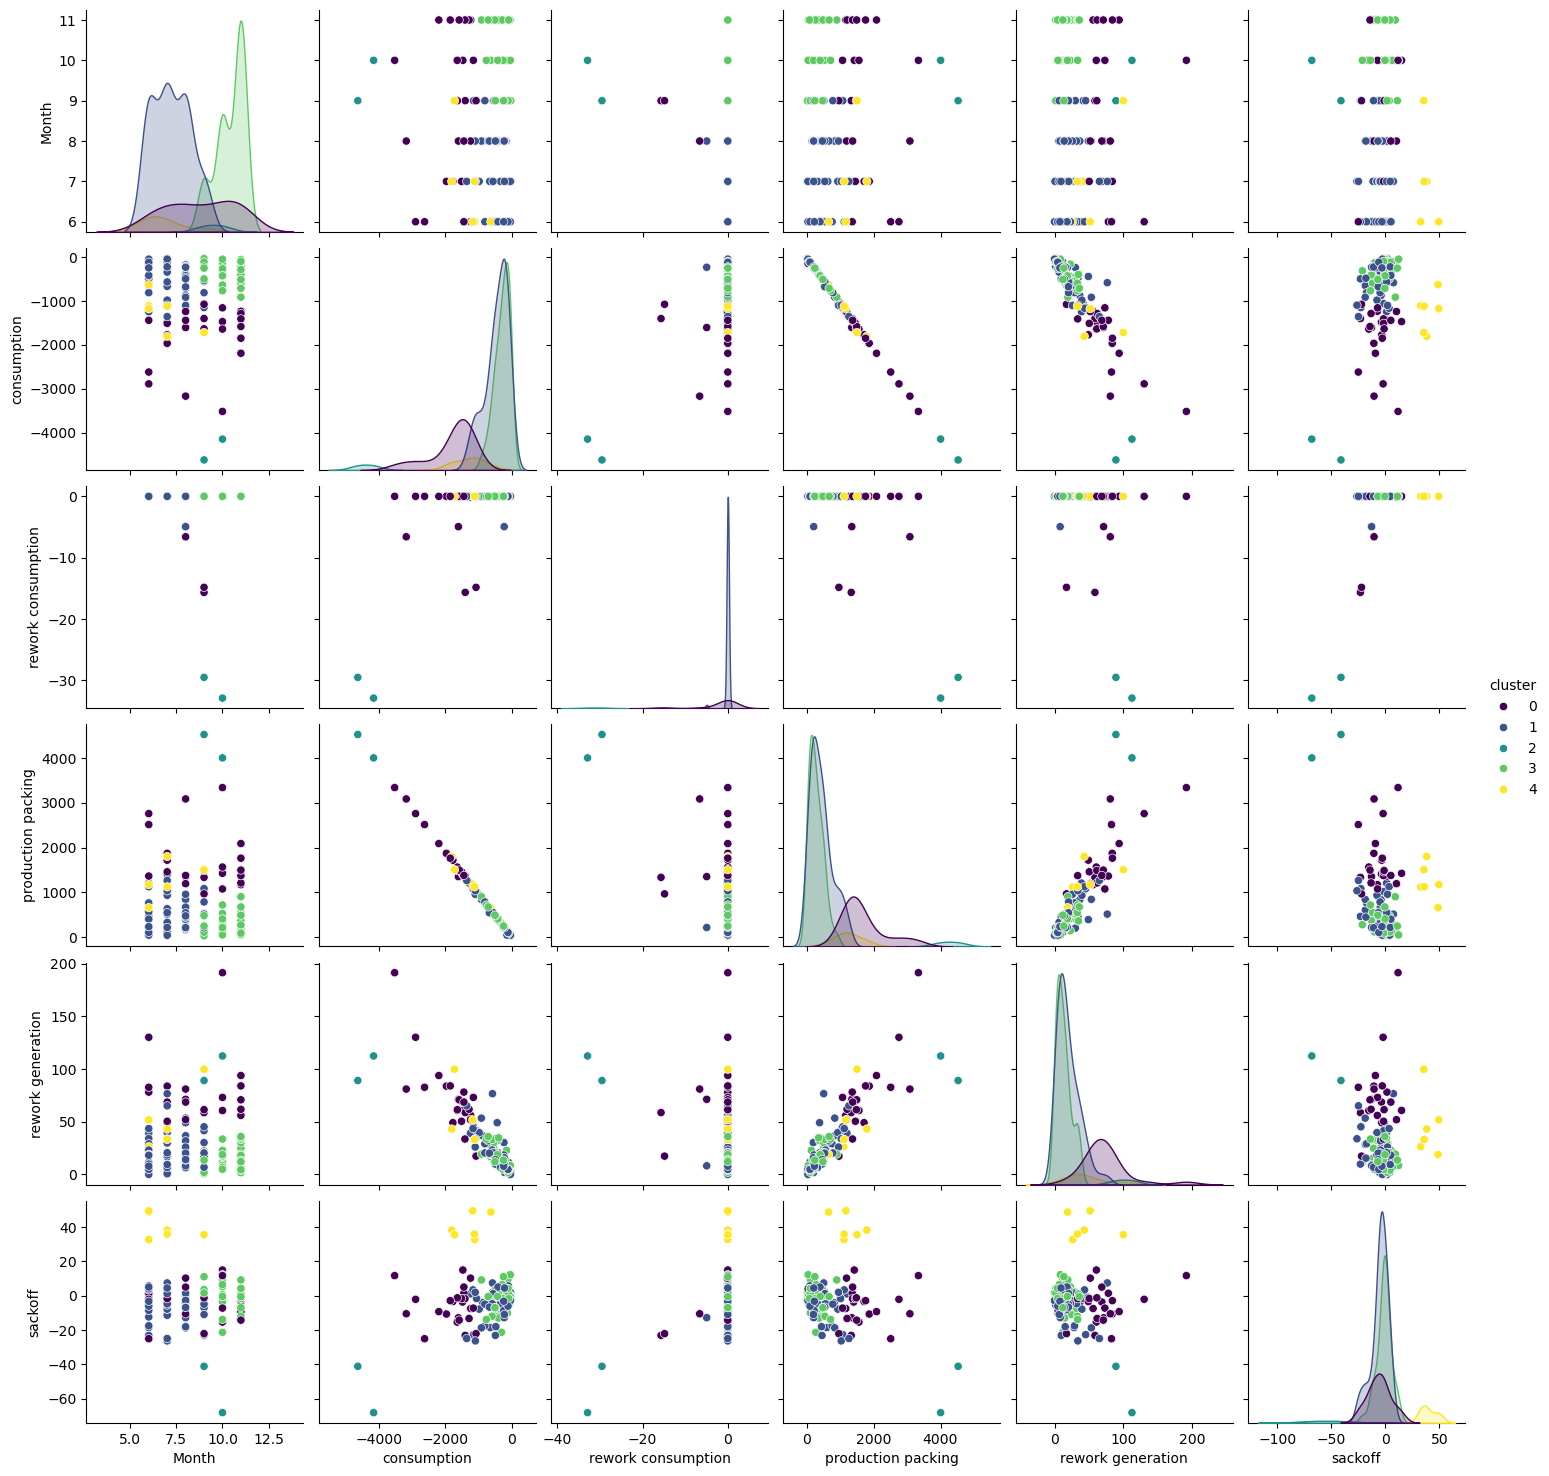

In [87]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Clustering Jerárquico
agg_clust = AgglomerativeClustering(n_clusters=5)
df['cluster'] = agg_clust.fit_predict(X_scaled)

# Graficar los resultados
sns.pairplot(df, hue='cluster', vars=['Month','consumption', 'rework consumption','production packing','rework generation','sackoff'], palette='viridis')
plt.show()

In [88]:
products['Cluster'] = df['cluster']
products.head()

,Month,Código,consumption,rework consumption,production packing,rework generation,sackoff,Cluster
0,6,1,-650.01,0.00,603.000,28.4530,-18.56,1
1,7,1,-1965.46,0.00,1870.975,83.8170,-10.67,0
2,8,1,-1605.19,-4.95,1350.975,71.2915,-12.86,0
3,6,2,-1244.95,0.00,1206.925,39.1130,1.09,1
4,7,2,-1480.24,0.00,1407.850,68.7165,-3.67,0


In [90]:
# Agrupar por cluster y mostrar estadísticas descriptivas
statistics_by_cluster = products.groupby('Cluster').agg({
    'sackoff': ['mean', 'std', 'min', 'max', 'median']
})

# Mostrar las estadísticas
print(statistics_by_cluster)

           sackoff                                 
              mean        std    min    max  median
Cluster                                            
0        -6.009583  10.459722 -25.04  14.97  -5.440
1        -5.303387   7.704265 -26.30   7.44  -4.145
2       -54.600000  19.077741 -68.09 -41.11 -54.600
3        -1.442558   6.753678 -21.32  12.25  -0.510
4        40.085000   7.179044  32.70  49.42  37.070


Análisis de sackoff por cluster

Cada cluster tiene características distintas en términos de media, dispersión y distribución de valores.

Cluster 0

- Media: -6.01
- Desviación estándar: 10.46
- Rango: -25.04 a 14.97
- Mediana: -5.44

Este cluster tiene valores mayormente negativos con una ligera dispersión. La media y la mediana están bastante alineadas, lo que indica que la distribución no está muy sesgada.

Cluster 1

- Media: -5.30
- Desviación estándar: 7.70
- Rango: -26.30 a 7.44
- Mediana: -4.15

Similar al cluster 0, pero con menos variabilidad (desviación estándar menor). Es probable que contenga valores más agrupados alrededor de su media, indicando menos dispersión.

Cluster 2

- Media: -54.60
- Desviación estándar: 19.08
- Rango: -68.09 a -41.11
- Mediana: -54.60

Este cluster es significativamente diferente. Tiene una media muy baja y valores altamente negativos. Además, su desviación estándar es alta, lo que sugiere una fuerte dispersión. Probablemente representa un grupo de datos con pérdidas extremas o situaciones atípicas.

Cluster 3

- Media: -1.44
- Desviación estándar: 6.75
- Rango: -21.32 a 12.25
- Mediana: -0.51

Este cluster se centra cerca de cero, lo que indica que los valores son más equilibrados y con menor impacto negativo. Su menor desviación estándar sugiere que los datos están menos dispersos en comparación con otros clusters negativos.

Cluster 4

- Media: 40.08
- Desviación estándar: 7.18
- Rango: 32.70 a 49.42
- Mediana: 37.07

Es el único cluster con valores positivos dominantes. La media y la mediana están en la misma dirección, lo que indica que el grupo está compuesto por valores consistentemente altos y positivos.

Conclusiones generales

Clusters negativos y positivos bien diferenciados

Clusters 0, 1, 2 y 3 tienen valores negativos, mientras que el cluster 4 es el único con valores positivos.
Esto sugiere que los datos pueden representar dos fenómenos distintos (pérdidas y ganancias, por ejemplo).

Cluster 2 es el más extremo en valores negativos. Tiene la menor media (-54.6) y la mayor desviación estándar (19.08). Puede representar casos atípicos o un segmento específico con pérdidas significativas.

Cluster 4 representa los valores más positivos y estables. Con una media de 40.08 y una desviación estándar moderada (7.18), este grupo tiene datos consistentemente positivos.

Clusters 0 y 1 son similares. Ambos tienen medias cercanas a -5 y rangos moderados de valores negativos.

Cluster 1 es más estable con una menor desviación estándar.

Cluster 3 es el más equilibrado. Su media cercana a cero sugiere que tiene valores más distribuidos entre pérdidas y ganancias moderadas.